In [1]:
## Import the  pyspark libraries adn create the pyspark session
import pyspark
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('Rainfall-predictions-ML-project').getOrCreate()
spark


In [2]:
## Read the train set
df_train_set=spark.read.csv('train.csv',header=True,inferSchema=True)
df_train_set.show()

+---+---+--------+-------+-----------+-------+--------+--------+-----+--------+-------------+---------+--------+
| id|day|pressure|maxtemp|temparature|mintemp|dewpoint|humidity|cloud|sunshine|winddirection|windspeed|rainfall|
+---+---+--------+-------+-----------+-------+--------+--------+-----+--------+-------------+---------+--------+
|  0|  1|  1017.4|   21.2|       20.6|   19.9|    19.4|    87.0| 88.0|     1.1|         60.0|     17.2|       1|
|  1|  2|  1019.5|   16.2|       16.9|   15.8|    15.4|    95.0| 91.0|     0.0|         50.0|     21.9|       1|
|  2|  3|  1024.1|   19.4|       16.1|   14.6|     9.3|    75.0| 47.0|     8.3|         70.0|     18.1|       1|
|  3|  4|  1013.4|   18.1|       17.8|   16.9|    16.8|    95.0| 95.0|     0.0|         60.0|     35.6|       1|
|  4|  5|  1021.8|   21.3|       18.4|   15.2|     9.6|    52.0| 45.0|     3.6|         40.0|     24.8|       0|
|  5|  6|  1022.7|   20.6|       18.6|   16.5|    12.5|    79.0| 81.0|     0.0|         20.0|   

In [3]:
## check the data types of each column in dataset
df_train_set.printSchema()

root
 |-- id: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- pressure: double (nullable = true)
 |-- maxtemp: double (nullable = true)
 |-- temparature: double (nullable = true)
 |-- mintemp: double (nullable = true)
 |-- dewpoint: double (nullable = true)
 |-- humidity: double (nullable = true)
 |-- cloud: double (nullable = true)
 |-- sunshine: double (nullable = true)
 |-- winddirection: double (nullable = true)
 |-- windspeed: double (nullable = true)
 |-- rainfall: integer (nullable = true)



In [4]:
## check the column names
df_train_set.columns

['id',
 'day',
 'pressure',
 'maxtemp',
 'temparature',
 'mintemp',
 'dewpoint',
 'humidity',
 'cloud',
 'sunshine',
 'winddirection',
 'windspeed',
 'rainfall']

## Data Preprocessing

In [5]:
## chech the null values
from pyspark.sql.functions import col,isnan, when, count
df_train_set.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_train_set.columns]
   ).show()


+---+---+--------+-------+-----------+-------+--------+--------+-----+--------+-------------+---------+--------+
| id|day|pressure|maxtemp|temparature|mintemp|dewpoint|humidity|cloud|sunshine|winddirection|windspeed|rainfall|
+---+---+--------+-------+-----------+-------+--------+--------+-----+--------+-------------+---------+--------+
|  0|  0|       0|      0|          0|      0|       0|       0|    0|       0|            0|        0|       0|
+---+---+--------+-------+-----------+-------+--------+--------+-----+--------+-------------+---------+--------+



In [6]:
df_train_set=df_train_set.select(['pressure','maxtemp','temparature','mintemp','dewpoint','humidity','cloud','sunshine','winddirection','windspeed','rainfall'])
df_train_set.show()

+--------+-------+-----------+-------+--------+--------+-----+--------+-------------+---------+--------+
|pressure|maxtemp|temparature|mintemp|dewpoint|humidity|cloud|sunshine|winddirection|windspeed|rainfall|
+--------+-------+-----------+-------+--------+--------+-----+--------+-------------+---------+--------+
|  1017.4|   21.2|       20.6|   19.9|    19.4|    87.0| 88.0|     1.1|         60.0|     17.2|       1|
|  1019.5|   16.2|       16.9|   15.8|    15.4|    95.0| 91.0|     0.0|         50.0|     21.9|       1|
|  1024.1|   19.4|       16.1|   14.6|     9.3|    75.0| 47.0|     8.3|         70.0|     18.1|       1|
|  1013.4|   18.1|       17.8|   16.9|    16.8|    95.0| 95.0|     0.0|         60.0|     35.6|       1|
|  1021.8|   21.3|       18.4|   15.2|     9.6|    52.0| 45.0|     3.6|         40.0|     24.8|       0|
|  1022.7|   20.6|       18.6|   16.5|    12.5|    79.0| 81.0|     0.0|         20.0|     15.7|       1|
|  1022.8|   19.5|       18.4|   15.3|    11.3|    56.0

In [7]:
## seperate the independent features and target lables
#independent_features=df_train_set.select(['id','day','pressure','maxtemp','temparature','mintemp','dewpoint','humidity','cloud','sunshine','winddirection','windspeed'])
#target_feature=df_train_set.select(['rainfall'])
#independent_features.show(),target_feature.show()

In [8]:
from pyspark.ml.feature import VectorAssembler
feature_assembler = VectorAssembler(inputCols=['pressure','maxtemp','temparature','mintemp','dewpoint','humidity','cloud','sunshine','winddirection','windspeed'],outputCol='independent_features')
output_features =feature_assembler.transform(df_train_set)
output_features.show()

+--------+-------+-----------+-------+--------+--------+-----+--------+-------------+---------+--------+--------------------+
|pressure|maxtemp|temparature|mintemp|dewpoint|humidity|cloud|sunshine|winddirection|windspeed|rainfall|independent_features|
+--------+-------+-----------+-------+--------+--------+-----+--------+-------------+---------+--------+--------------------+
|  1017.4|   21.2|       20.6|   19.9|    19.4|    87.0| 88.0|     1.1|         60.0|     17.2|       1|[1017.4,21.2,20.6...|
|  1019.5|   16.2|       16.9|   15.8|    15.4|    95.0| 91.0|     0.0|         50.0|     21.9|       1|[1019.5,16.2,16.9...|
|  1024.1|   19.4|       16.1|   14.6|     9.3|    75.0| 47.0|     8.3|         70.0|     18.1|       1|[1024.1,19.4,16.1...|
|  1013.4|   18.1|       17.8|   16.9|    16.8|    95.0| 95.0|     0.0|         60.0|     35.6|       1|[1013.4,18.1,17.8...|
|  1021.8|   21.3|       18.4|   15.2|     9.6|    52.0| 45.0|     3.6|         40.0|     24.8|       0|[1021.8,21.3,1

In [9]:
## select the  indepedent features from dataset
output_independent_features=output_features.select('independent_features')
output_independent_features.show()

+--------------------+
|independent_features|
+--------------------+
|[1017.4,21.2,20.6...|
|[1019.5,16.2,16.9...|
|[1024.1,19.4,16.1...|
|[1013.4,18.1,17.8...|
|[1021.8,21.3,18.4...|
|[1022.7,20.6,18.6...|
|[1022.8,19.5,18.4...|
|[1019.7,15.8,13.6...|
|[1017.4,17.6,16.5...|
|[1025.4,16.5,14.4...|
|[1016.8,16.3,15.3...|
|[1012.5,16.2,15.2...|
|[1020.4,15.0,15.5...|
|[1012.5,13.5,12.9...|
|[1018.4,17.8,16.5...|
|[1024.3,15.3,12.9...|
|[1022.5,16.3,13.1...|
|[1034.6,17.5,16.2...|
|[1024.1,16.8,15.8...|
|[1020.2,16.4,14.2...|
+--------------------+
only showing top 20 rows



In [10]:
## scale the dataset usinf standard scaling
#from pyspark.ml.feature import StandardScaler
#scaler=StandardScaler(inputCol='independent_features', outputCol='scaled_features',withStd=True, withMean=False)
#scaler_model=scaler.fit(output_independent_features)
#scaled_train_data = scaler_model.transform(output_independent_features)
#scaled_train_data.show()

In [11]:
#scaled_train_preprocessed_data=scaled_train_data.select('scaled_features')
#scaled_train_preprocessed_data.show()

## Explotary Data Analysis

In [12]:
#scaled_train_preprocessed_data.show()

In [13]:
## convert to pandas dataframe
#pandas_df=scaled_train_preprocessed_data.toPandas()
#pandas_df.head()



In [14]:
#pandas_df.shape

In [15]:
df_train_set_pandas = df_train_set.toPandas()
df_train_set_pandas.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [16]:
df_train_set_pandas_new=df_train_set_pandas.drop('rainfall',axis=True)
df_train_set_pandas_new.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2
1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9
2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1
3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6
4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8


In [17]:
df_train_set_pandas_target_column=df_train_set_pandas['rainfall']
df_train_set_pandas_target_column

0       1
1       1
2       1
3       1
4       0
       ..
2185    1
2186    1
2187    1
2188    1
2189    1
Name: rainfall, Length: 2190, dtype: int32

In [18]:
df_train_set_pandas.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine', 'winddirection', 'windspeed', 'rainfall'],
      dtype='object')

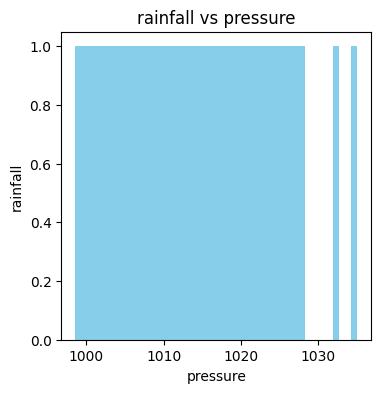

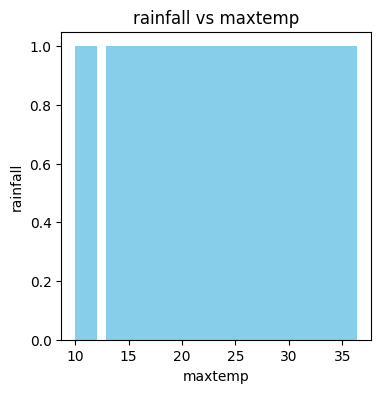

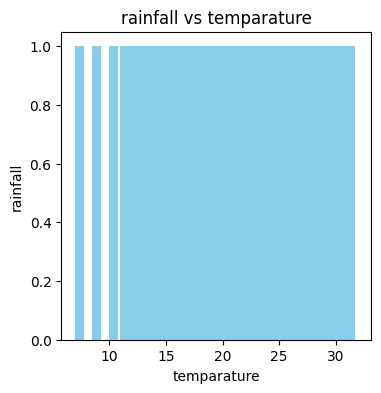

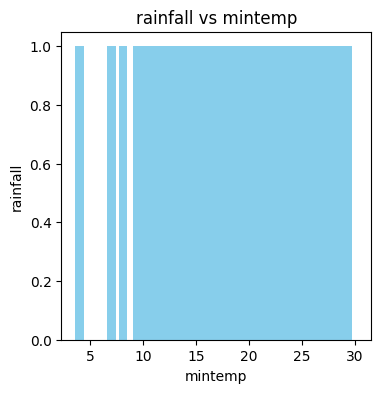

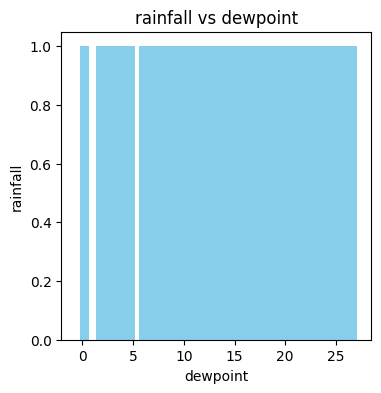

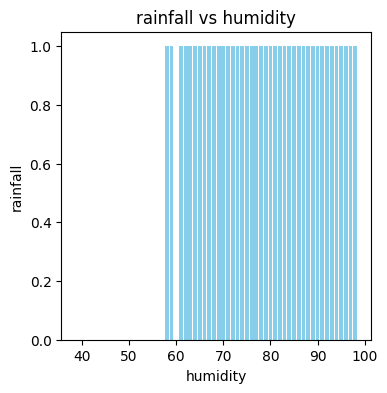

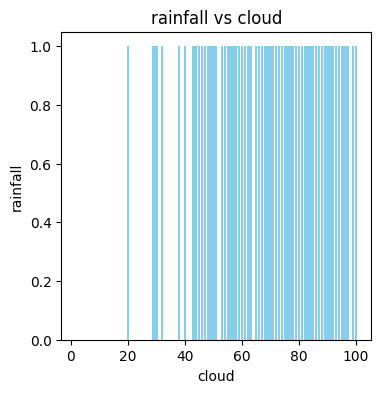

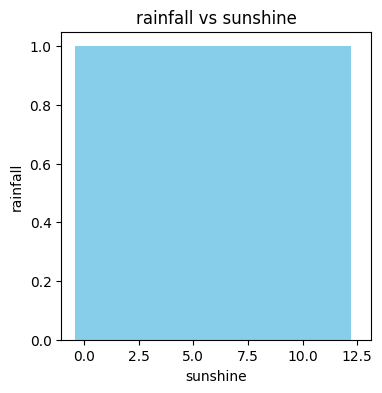

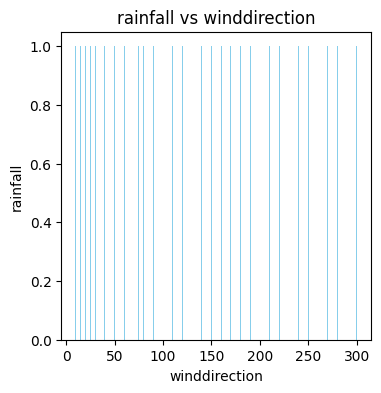

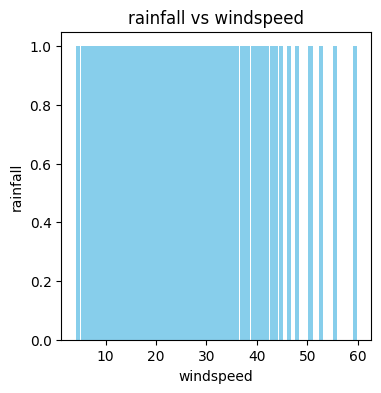

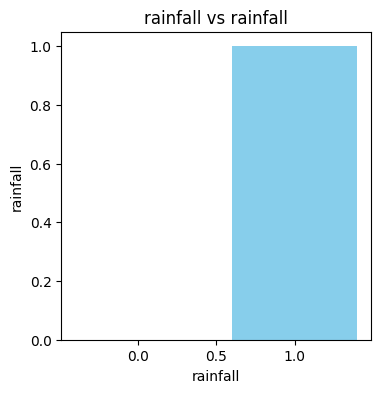

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
for df_train_set_pandas_columns in df_train_set_pandas.columns:
    #print(type(df_train_set_pandas_columns))
    plt.figure(figsize=(4, 4))
    plt.bar(df_train_set_pandas[df_train_set_pandas_columns], df_train_set_pandas["rainfall"],color="skyblue")
    plt.xlabel(df_train_set_pandas_columns)
    plt.ylabel("rainfall")
    plt.title("rainfall vs "+df_train_set_pandas_columns)
    plt.show()

In [20]:
## check the information of dataset
pandas_df_info=df_train_set_pandas.info()
pandas_df_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pressure       2190 non-null   float64
 1   maxtemp        2190 non-null   float64
 2   temparature    2190 non-null   float64
 3   mintemp        2190 non-null   float64
 4   dewpoint       2190 non-null   float64
 5   humidity       2190 non-null   float64
 6   cloud          2190 non-null   float64
 7   sunshine       2190 non-null   float64
 8   winddirection  2190 non-null   float64
 9   windspeed      2190 non-null   float64
 10  rainfall       2190 non-null   int32  
dtypes: float64(10), int32(1)
memory usage: 179.8 KB


In [21]:
## check the summary stactics of dataset
pandas_df_stat=df_train_set_pandas.describe()
pandas_df_stat

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


In [22]:
correlation=df_train_set_pandas.corr()
print(correlation)

               pressure   maxtemp  temparature   mintemp  dewpoint  humidity  \
pressure       1.000000 -0.800499    -0.816531 -0.814453 -0.817008 -0.119949   
maxtemp       -0.800499  1.000000     0.982932  0.965529  0.906703 -0.072615   
temparature   -0.816531  0.982932     1.000000  0.987150  0.933617 -0.025016   
mintemp       -0.814453  0.965529     0.987150  1.000000  0.941342  0.009891   
dewpoint      -0.817008  0.906703     0.933617  0.941342  1.000000  0.153390   
humidity      -0.119949 -0.072615    -0.025016  0.009891  0.153390  1.000000   
cloud          0.098600 -0.289047    -0.249355 -0.219399 -0.088446  0.584854   
sunshine      -0.257163  0.452387     0.414019  0.379497  0.249676 -0.541592   
winddirection -0.643293  0.662235     0.668963  0.663828  0.643073 -0.012430   
windspeed      0.266012 -0.354168    -0.342262 -0.328871 -0.312179  0.062285   
rainfall      -0.049886 -0.079304    -0.049660 -0.026841  0.081965  0.454213   

                  cloud  sunshine  wind

## Model selection and Model training

In [23]:
## Split the trainset into train and test set (validation set)
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df_train_set_pandas_new,df_train_set_pandas_target_column, test_size=0.2, random_state=42)

In [24]:
X_train.shape

(1752, 10)

In [25]:
X_test.shape

(438, 10)

In [26]:
y_train.shape

(1752,)

In [27]:
y_test.shape

(438,)

In [28]:
## Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [29]:
rf_clf_predictions=rf_clf.predict(X_test)
rf_clf_predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [30]:
## check the randomforest classifier model performance

In [31]:
from sklearn.metrics import accuracy_score
rf_clf_accuracy=accuracy_score(y_test,rf_clf_predictions)
rf_clf_accuracy

0.8447488584474886

In [32]:
from sklearn.metrics import mean_squared_error
rf_clf_mean_sqaured_error=mean_squared_error(y_test,rf_clf_predictions)
rf_clf_mean_sqaured_error

0.1552511415525114

In [33]:
from  sklearn.metrics import confusion_matrix
rf_clf_confusion_matrix=confusion_matrix(y_test,rf_clf_predictions)
rf_clf_confusion_matrix

array([[ 72,  47],
       [ 21, 298]], dtype=int64)

In [34]:
from sklearn.metrics import classification_report
rf_clf_classification_report=classification_report(y_test,rf_clf_predictions)
print(rf_clf_classification_report)

              precision    recall  f1-score   support

           0       0.77      0.61      0.68       119
           1       0.86      0.93      0.90       319

    accuracy                           0.84       438
   macro avg       0.82      0.77      0.79       438
weighted avg       0.84      0.84      0.84       438



In [35]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [36]:
## make the predictions in DecisionTree Classifier using X_test
dt_clf_predictions=dt_clf.predict(X_test)
dt_clf_predictions

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,

In [37]:
## check the decisiontree classifier model performance

In [38]:
from sklearn.metrics import accuracy_score
dt_clf_accuracy_score=accuracy_score(y_test,dt_clf_predictions)
dt_clf_accuracy_score

0.7876712328767124

In [39]:
from sklearn.metrics import mean_squared_error
dt_clf_mean_squared_error=mean_squared_error(y_test,dt_clf_predictions)
dt_clf_mean_squared_error

0.21232876712328766

In [40]:
from sklearn.metrics import classification_report
dt_clf_classification_report=classification_report(y_test,dt_clf_predictions)
print(dt_clf_classification_report)

              precision    recall  f1-score   support

           0       0.61      0.60      0.60       119
           1       0.85      0.86      0.85       319

    accuracy                           0.79       438
   macro avg       0.73      0.73      0.73       438
weighted avg       0.79      0.79      0.79       438



In [41]:
from sklearn.metrics import confusion_matrix
dt_clf_confusion_matrix=confusion_matrix(y_test,dt_clf_predictions)
dt_clf_confusion_matrix

array([[ 71,  48],
       [ 45, 274]], dtype=int64)

In [42]:
from sklearn.linear_model import LogisticRegression
lr_clf=LogisticRegression()
lr_clf.fit(X_train,y_train)

c:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
lr_predictions=lr_clf.predict(X_test)
lr_predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [44]:
## Evaluvate the logistic regression model performance
from sklearn.metrics import mean_squared_error
lr_clf_mean_squared_error=mean_squared_error(y_test,lr_predictions)
lr_clf_mean_squared_error

0.1506849315068493

In [45]:
from sklearn.metrics import accuracy_score
lr_clf_accuracy_score=accuracy_score(y_test,lr_predictions)
lr_clf_accuracy_score

0.8493150684931506

In [46]:
from sklearn.metrics import classification_report
lr_clf_classification_report=classification_report(y_test,lr_predictions)
print(lr_clf_classification_report)

              precision    recall  f1-score   support

           0       0.79      0.61      0.69       119
           1       0.86      0.94      0.90       319

    accuracy                           0.85       438
   macro avg       0.83      0.77      0.79       438
weighted avg       0.84      0.85      0.84       438



In [47]:
from sklearn.metrics import confusion_matrix
lr_clf_confusion_matrix=confusion_matrix(y_test,lr_predictions)
lr_clf_confusion_matrix

array([[ 72,  47],
       [ 19, 300]], dtype=int64)

In [48]:
from sklearn.svm import SVC
svc_clf=SVC()
svc_clf.fit(X_train,y_train)

SVC()

In [49]:
svc_predictions=svc_clf.predict(X_test)
svc_predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [50]:
## Evaluvate the SVC model performance
from sklearn.metrics import mean_squared_error
svc_mean_sqaured_error=mean_squared_error(y_test,svc_predictions)
svc_mean_sqaured_error

0.2602739726027397

In [51]:
from sklearn.metrics import accuracy_score
svc_accuracy_score=accuracy_score(y_test,svc_predictions)
svc_accuracy_score

0.7397260273972602

In [52]:
from sklearn.metrics import classification_report
svc_classification_report=classification_report(y_test,svc_predictions)
print(svc_classification_report)

              precision    recall  f1-score   support

           0       1.00      0.04      0.08       119
           1       0.74      1.00      0.85       319

    accuracy                           0.74       438
   macro avg       0.87      0.52      0.46       438
weighted avg       0.81      0.74      0.64       438



In [53]:
from sklearn.metrics import confusion_matrix
svc_confusion_matrix=confusion_matrix(y_test,svc_predictions)
svc_confusion_matrix

array([[  5, 114],
       [  0, 319]], dtype=int64)

## Hyper Parameter Tuning and Grid Search CV

In [54]:
## Random Forest Classifier

In [55]:
from sklearn.model_selection import GridSearchCV

rf_clf_param_grid={'n_estimators':[100,200,300,400],'criterion':['gini','entropy','log_loss'],
                   'max_depth':[100,200,300,400],'min_samples_split':[2,4,6,8,10]}

In [56]:
grid_search_cv_rf_clf=GridSearchCV(estimator=rf_clf,param_grid=rf_clf_param_grid)
grid_search_cv_rf_clf.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [100, 200, 300, 400],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [100, 200, 300, 400]})

In [57]:
grid_search_cv_rf_clf.best_params_

{'criterion': 'gini',
 'max_depth': 100,
 'min_samples_split': 8,
 'n_estimators': 400}

In [58]:
## Make the predictions using grid_search_cv_rf_clf
grid_search_cv_rf_clf_predictions=grid_search_cv_rf_clf.predict(X_test)
grid_search_cv_rf_clf_predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [59]:
## evaluvate perofrmance of random forest classifier model after doing the hyper parameter tuning and grid search cv

In [60]:
grid_search_cv_rf_clf_accuracy_score=grid_search_cv_rf_clf.score(X_test,y_test)
grid_search_cv_rf_clf_accuracy_score

0.8561643835616438

In [61]:
grid_search_cv_rf_clf_mean_squared_error=mean_squared_error(y_test,grid_search_cv_rf_clf_predictions)
grid_search_cv_rf_clf_mean_squared_error

0.14383561643835616

In [62]:
grid_search_cv_rf_clf_classification_report=classification_report(y_test,grid_search_cv_rf_clf_predictions)
print(grid_search_cv_rf_clf_classification_report)

              precision    recall  f1-score   support

           0       0.80      0.62      0.70       119
           1       0.87      0.94      0.91       319

    accuracy                           0.86       438
   macro avg       0.84      0.78      0.80       438
weighted avg       0.85      0.86      0.85       438



In [63]:
grid_search_cv_rf_clf_confusion_matrix=confusion_matrix(y_test,grid_search_cv_rf_clf_predictions)
grid_search_cv_rf_clf_confusion_matrix

array([[ 74,  45],
       [ 18, 301]], dtype=int64)

In [64]:
## Decision Tree classifier


In [65]:
from sklearn.model_selection import GridSearchCV

dt_clf_param_grid={'criterion':["gini","entropy","log_loss"],'splitter':['best','random'],'max_depth':[100,200,300,400],
                   'min_samples_split':[2,4,6,8,10],'min_samples_leaf':[2,4,6,8,10]}

In [66]:
dt_clf_grid_search_cv=GridSearchCV(estimator=dt_clf,param_grid=dt_clf_param_grid)
dt_clf_grid_search_cv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [100, 200, 300, 400],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'splitter': ['best', 'random']})

In [67]:
## Identify the decision tree best paramters after completing the hyper parameter tuning and grid search cv
dt_clf_grid_search_cv.best_params_

{'criterion': 'log_loss',
 'max_depth': 300,
 'min_samples_leaf': 10,
 'min_samples_split': 4,
 'splitter': 'random'}

In [68]:
## make the predictions
dt_clf_grid_search_cv_predictions=dt_clf_grid_search_cv.predict(X_test)
dt_clf_grid_search_cv_predictions


array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,

In [69]:
## Evaluvate the decision tree model after doing the hyper parameter tuning and grid search cv
dt_clf_grid_search_cv_accuracy_score=accuracy_score(y_test,dt_clf_grid_search_cv_predictions)
dt_clf_grid_search_cv_accuracy_score

0.8059360730593608

In [70]:
dt_clf_grid_search_cv_mean_sqaured_error=mean_squared_error(y_test,dt_clf_grid_search_cv_predictions)
dt_clf_grid_search_cv_mean_sqaured_error

0.19406392694063926

In [71]:
dt_clf_grid_search_cv_classification_report=classification_report(y_test,dt_clf_grid_search_cv_predictions)
print(dt_clf_grid_search_cv_classification_report)

              precision    recall  f1-score   support

           0       0.69      0.52      0.59       119
           1       0.84      0.91      0.87       319

    accuracy                           0.81       438
   macro avg       0.76      0.72      0.73       438
weighted avg       0.80      0.81      0.80       438



In [72]:
dt_clf_grid_search_cv_confusion_matrix=confusion_matrix(y_test,dt_clf_grid_search_cv_predictions)
dt_clf_grid_search_cv_confusion_matrix

array([[ 62,  57],
       [ 28, 291]], dtype=int64)

In [73]:
## Logistic Regression model


In [74]:
from sklearn.model_selection import GridSearchCV
param_grid={'penalty':['l1','elasticnet','l2'],'dual':[False],'C':[100.0,200.0,300.0,400.0,500.0,600.0,700.0,800.0,900.0,1000.0],
            'class_weight':['dict','balanced'],'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

In [75]:
param_grid

{'penalty': ['l1', 'elasticnet', 'l2'],
 'dual': [False],
 'C': [100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800.0, 900.0, 1000.0],
 'class_weight': ['dict', 'balanced'],
 'solver': ['lbfgs',
  'liblinear',
  'newton-cg',
  'newton-cholesky',
  'sag',
  'saga']}

In [76]:
from sklearn.model_selection import GridSearchCV

lr_clf_grid_search_cv=GridSearchCV(estimator=lr_clf,param_grid=param_grid)
lr_clf_grid_search_cv.fit(X_train,y_train)



c:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0,
                               800.0, 900.0, 1000.0],
                         'class_weight': ['dict', 'balanced'], 'dual': [False],
                         'penalty': ['l1', 'elasticnet', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [77]:
lr_clf_grid_search_cv.best_params_

{'C': 800.0,
 'class_weight': 'balanced',
 'dual': False,
 'penalty': 'l2',
 'solver': 'saga'}

In [78]:
## Make the predictions using logistic regression
lr_clf_grid_search_cv_predictions=lr_clf_grid_search_cv.predict(X_test)
lr_clf_grid_search_cv_predictions

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [79]:
## Evaluvate the  logistic regression model after doing the hyper parameter tuning and gridf search  cv

lr_clf_grid_search_cv_mean_squared_error=mean_squared_error(lr_clf_grid_search_cv_predictions,y_test)
lr_clf_grid_search_cv_mean_squared_error

0.16666666666666666

In [80]:
lr_clf_grid_search_cv_accuracy_score=accuracy_score(lr_clf_grid_search_cv_predictions,y_test)
lr_clf_grid_search_cv_accuracy_score

0.8333333333333334

In [81]:
lr_clf_grid_search_cv_confusion_matrix=confusion_matrix(lr_clf_grid_search_cv_predictions,y_test)
lr_clf_grid_search_cv_confusion_matrix

array([[ 81,  35],
       [ 38, 284]], dtype=int64)

In [82]:
lr_clf_grid_search_cv_classification_report=classification_report(lr_clf_grid_search_cv_predictions,y_test)
print(lr_clf_grid_search_cv_classification_report)

              precision    recall  f1-score   support

           0       0.68      0.70      0.69       116
           1       0.89      0.88      0.89       322

    accuracy                           0.83       438
   macro avg       0.79      0.79      0.79       438
weighted avg       0.83      0.83      0.83       438



In [83]:
## Get the summary of  accuracies after doing the   hyper parameter tuning 
grid_search_cv_rf_clf_accuracy_score,dt_clf_grid_search_cv_accuracy_score,lr_clf_grid_search_cv_accuracy_score


(0.8561643835616438, 0.8059360730593608, 0.8333333333333334)

In [84]:
## Get the accuracies of  model before doing  the hyper parameter tuning

In [85]:
rf_clf_accuracy,dt_clf_accuracy_score,lr_clf_accuracy_score

(0.8447488584474886, 0.7876712328767124, 0.8493150684931506)

In [86]:
## After comppleting the hyper parameter tuning and grid search  cv   random forest classifier  can be recognized as the best model

#### Voting Classifier Ensemble Technique

In [87]:
## import  voting classifier

In [88]:
from sklearn.ensemble import VotingClassifier

## Making the final model using   voiting classifier
final_model=VotingClassifier(estimators=[('rf_classifier',rf_clf),('decision_tree',dt_clf),('logistic_regression0',lr_clf)], voting='hard')

## train the  final model using  all the train dataet
final_model.fit(X_train,y_train)

c:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('rf_classifier', RandomForestClassifier()),
                             ('decision_tree', DecisionTreeClassifier()),
                             ('logistic_regression0', LogisticRegression())])

In [89]:
## Make the  predictions using final model
final_model_predictions=final_model.predict(X_test)
final_model_predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,

In [90]:
## Evaluvate the final model  performance  using metrics
from sklearn.metrics import accuracy_score
final_model_accuracy_score=accuracy_score(y_test,final_model_predictions)
final_model_accuracy_score


0.8493150684931506

In [91]:
from sklearn.metrics  import mean_squared_error
final_model_mean_squared_error=mean_squared_error(y_test,final_model_predictions)
final_model_mean_squared_error

0.1506849315068493

In [92]:
from sklearn.metrics import classification_report
final_model_classification_report=classification_report(y_test,final_model_predictions)
print(final_model_classification_report)

              precision    recall  f1-score   support

           0       0.78      0.61      0.69       119
           1       0.87      0.94      0.90       319

    accuracy                           0.85       438
   macro avg       0.83      0.78      0.79       438
weighted avg       0.84      0.85      0.84       438



In [93]:
from sklearn.metrics import confusion_matrix
final_model_confusion_matrix=confusion_matrix(y_test,final_model_predictions)
final_model_confusion_matrix

array([[ 73,  46],
       [ 20, 299]], dtype=int64)

In [94]:
## ensemble method use for after doing the hyper parameter tuning and grid search  cv

In [95]:
from sklearn.ensemble import VotingClassifier
final_model_after_grid_search_cv=VotingClassifier(estimators=[('rf_clf_after_hyper_parameter',grid_search_cv_rf_clf),('dt_clf_after_hyper_parameter',dt_clf_grid_search_cv),
                                                ('lr_after_hyper_parameter',lr_clf_grid_search_cv)], voting='hard')
final_model_after_grid_search_cv.fit(X_train,y_train)


c:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

VotingClassifier(estimators=[('rf_clf_after_hyper_parameter',
                              GridSearchCV(estimator=RandomForestClassifier(),
                                           param_grid={'criterion': ['gini',
                                                                     'entropy',
                                                                     'log_loss'],
                                                       'max_depth': [100, 200,
                                                                     300, 400],
                                                       'min_samples_split': [2,
                                                                             4,
                                                                             6,
                                                                             8,
                                                                             10],
                                                       'n_estimators': [100,
                                                                        200,
                                                                        300,
                                                                        400]})),
                             ('dt_clf_after_hyper_parameter',
                              GridSearchCV(estimator=DecisionTreeClassifier(),
                                           param_gr...
                                                                             10],
                                                       'splitter': ['best',
                                                                    'random']})),
                             ('lr_after_hyper_parameter',
                              GridSearchCV(estimator=LogisticRegression(),
                                           param_grid={'C': [100.0, 200.0,
                                                             300.0, 400.0,
                                                             500.0, 600.0,
                                                             700.0, 800.0,
                                                             900.0, 1000.0],
                                                       'class_weight': ['dict',
                                                                        'balanced'],
                                                       'dual': [False],
                                                       'penalty': ['l1',
                                                                   'elasticnet',
                                                                   'l2'],
                                                       'solver': ['lbfgs',
                                                                  'liblinear',
                                                                  'newton-cg',
                                                                  'newton-cholesky',
                                                                  'sag',
                                                                  'saga']}))])

In [96]:
## Make the  predictions 
final_model_after_grid_search_cv_predictions=final_model_after_grid_search_cv.predict(X_test)
final_model_after_grid_search_cv_predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [97]:
## Evaluvate the model performace after doing the  hypaer parameter tuning and grid search  cv

In [98]:
from sklearn.metrics import  accuracy_score
final_model_after_grid_search_cv_accuracy_score=accuracy_score(y_test,final_model_after_grid_search_cv_predictions)
final_model_after_grid_search_cv_accuracy_score

0.8493150684931506

In [99]:
from sklearn.metrics  import  mean_squared_error
final_model_after_grid_search_cv_mean_sqaured_error=mean_squared_error(y_test,final_model_after_grid_search_cv_predictions)
final_model_after_grid_search_cv_mean_sqaured_error

0.1506849315068493

In [100]:
from sklearn.metrics  import  classification_report
final_model_after_grid_search_cv_classification_report=classification_report(y_test,final_model_after_grid_search_cv_predictions)
print(final_model_after_grid_search_cv_classification_report)

              precision    recall  f1-score   support

           0       0.78      0.62      0.69       119
           1       0.87      0.93      0.90       319

    accuracy                           0.85       438
   macro avg       0.82      0.78      0.80       438
weighted avg       0.84      0.85      0.84       438



In [101]:
from sklearn.metrics import confusion_matrix
final_model_after_grid_search_cv_confusion_matrix=confusion_matrix(y_test,final_model_after_grid_search_cv_predictions)
final_model_after_grid_search_cv_confusion_matrix

array([[ 74,  45],
       [ 21, 298]], dtype=int64)

In [102]:
## summary of  models accuracy

In [103]:
## After using  voting classifier to  hyper parameter tuned  models

In [104]:
final_model_after_grid_search_cv_accuracy_score

0.8493150684931506

In [105]:
##  Before  using  the voting classifier and hyper parameter tuning

In [106]:
rf_clf_accuracy,dt_clf_accuracy_score,lr_clf_accuracy_score

(0.8447488584474886, 0.7876712328767124, 0.8493150684931506)

In [107]:
## After applying to the hyper parameter tuning and grid search  cv

In [108]:
grid_search_cv_rf_clf_accuracy_score,dt_clf_grid_search_cv_accuracy_score,lr_clf_grid_search_cv_accuracy_score

(0.8561643835616438, 0.8059360730593608, 0.8333333333333334)

In [109]:
## When we are considering the above models accuracies,  before and after applying hyper parameter tuning and grid search  cv, random forest classifier model
# accuracy is  good for final predictions among other models like logistic regression and decision tree classifier.But this randomforest model accuracy also  not sufficient for making the final predictions. Using the ensemble  technique like voting classifier also we cannot  get the sufficient accuracy for this random forest model and  other model used. So then , As a soultion I moved into the deep learning concept.In this, concept I am going to use 
# ANN (Artificial Neural Network) architecture to  get better accuracy.

## Deep Learning (ANN - Artificail Neural Network Architecture)

In [110]:
import tensorflow as tf
import numpy as np
#tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, input_shape=(10,)),  # First Dense Layer
    tf.keras.layers.LeakyReLU(alpha=0.01),# LeakyReLU Activation
    #tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(16, activation='relu'),
    #tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.Dropout(0.8),
    tf.keras.layers.Dense(256, activation='relu'),
    #tf.keras.layers.Dropout(0.10),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy','mse']
)

c:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [111]:
history=model.fit(
    X_train,y_train,
    epochs=5000,
    batch_size=10000000
)

Epoch 1/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.2397 - loss: 1.6092 - mse: 0.5821
Epoch 2/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.7597 - loss: 5.2713 - mse: 0.2403
Epoch 3/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.7597 - loss: 7.1829 - mse: 0.2403
Epoch 4/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.7597 - loss: 7.3147 - mse: 0.2403
Epoch 5/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.7597 - loss: 6.3883 - mse: 0.2403
Epoch 6/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.7597 - loss: 4.8068 - mse: 0.2403
Epoch 7/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.7597 - loss: 2.7576 - mse: 0.2403
Epoch 8/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.7597 - loss: 0.5930 - mse: 0.1946
Epoch 9/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.2403 - loss: 5.7555 - mse: 0.7589
Epoch 10/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.2403 - loss: 5.2947 - mse: 0.7582
Ep

In [117]:
## Make the predictions using ANN
ann_predictions=model.predict(X_test)
ann_predictions

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


array([[8.87120068e-01],
       [8.35524797e-01],
       [6.56111121e-01],
       [7.78556049e-01],
       [9.35129821e-01],
       [9.74528432e-01],
       [9.67536747e-01],
       [9.34848607e-01],
       [6.72456741e-01],
       [9.48001146e-01],
       [9.76721466e-01],
       [9.13934231e-01],
       [7.39187837e-01],
       [1.48508132e-01],
       [2.87606090e-01],
       [7.18085885e-01],
       [9.74399626e-01],
       [7.59977102e-01],
       [6.85819626e-01],
       [9.50436741e-02],
       [3.92251819e-01],
       [9.75918233e-01],
       [2.10635304e-01],
       [8.94816577e-01],
       [3.44967246e-01],
       [9.72844660e-01],
       [8.65124524e-01],
       [8.80235314e-01],
       [8.14961672e-01],
       [9.72065806e-01],
       [9.96801257e-01],
       [9.32195723e-01],
       [8.97046804e-01],
       [1.61761969e-01],
       [2.05690935e-01],
       [9.82744217e-01],
       [9.52085257e-01],
       [9.72363472e-01],
       [6.41205668e-01],
       [3.87352049e-01],


In [113]:
## test the model

In [118]:
import numpy as np
#1021.8|   21.3|       18.4|   15.2|     9.6|    52.0| 45.0|     3.6|         40.0|     24.8
sample_data=[1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2]
sample_data_array=np.array(sample_data).reshape(1, -1)  
ann_model_predictions=model.predict(sample_data_array)
if ann_model_predictions[0]<=0.5:
    print("Rainfall is not happend")
else:
    print("Rainfall is happend")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Rainfall is happend


In [115]:
### Testing the model using new fresh test dataset

In [116]:
train_set=spark.read.csv("test.csv", header=True,inferSchema=True)
train_set.show()

+----+---+--------+-------+-----------+-------+--------+--------+-----+--------+-------------+---------+
|  id|day|pressure|maxtemp|temparature|mintemp|dewpoint|humidity|cloud|sunshine|winddirection|windspeed|
+----+---+--------+-------+-----------+-------+--------+--------+-----+--------+-------------+---------+
|2190|  1|  1019.5|   17.5|       15.8|   12.7|    14.9|    96.0| 99.0|     0.0|         50.0|     24.3|
|2191|  2|  1016.5|   17.5|       16.5|   15.8|    15.1|    97.0| 99.0|     0.0|         50.0|     35.3|
|2192|  3|  1023.9|   11.2|       10.4|    9.4|     8.9|    86.0| 96.0|     0.0|         40.0|     16.9|
|2193|  4|  1022.9|   20.6|       17.3|   15.2|     9.5|    75.0| 45.0|     7.1|         20.0|     50.6|
|2194|  5|  1022.2|   16.1|       13.8|    6.4|     4.3|    68.0| 49.0|     9.2|         20.0|     19.4|
|2195|  6|  1027.1|   15.6|       12.6|   11.5|     9.0|    76.0| 94.0|     0.0|         20.0|     41.4|
|2196|  7|  1022.6|   15.5|       13.7|   10.7|    11.8

In [119]:
## Test the Ann architecture model using  test set

In [121]:
## Read the test set

In [122]:
test_set=spark.read.csv("test.csv",header=True, inferSchema=True)
test_set.show()

+----+---+--------+-------+-----------+-------+--------+--------+-----+--------+-------------+---------+
|  id|day|pressure|maxtemp|temparature|mintemp|dewpoint|humidity|cloud|sunshine|winddirection|windspeed|
+----+---+--------+-------+-----------+-------+--------+--------+-----+--------+-------------+---------+
|2190|  1|  1019.5|   17.5|       15.8|   12.7|    14.9|    96.0| 99.0|     0.0|         50.0|     24.3|
|2191|  2|  1016.5|   17.5|       16.5|   15.8|    15.1|    97.0| 99.0|     0.0|         50.0|     35.3|
|2192|  3|  1023.9|   11.2|       10.4|    9.4|     8.9|    86.0| 96.0|     0.0|         40.0|     16.9|
|2193|  4|  1022.9|   20.6|       17.3|   15.2|     9.5|    75.0| 45.0|     7.1|         20.0|     50.6|
|2194|  5|  1022.2|   16.1|       13.8|    6.4|     4.3|    68.0| 49.0|     9.2|         20.0|     19.4|
|2195|  6|  1027.1|   15.6|       12.6|   11.5|     9.0|    76.0| 94.0|     0.0|         20.0|     41.4|
|2196|  7|  1022.6|   15.5|       13.7|   10.7|    11.8

In [123]:
## check the data types of each column of dataset

In [124]:
test_set.printSchema()

root
 |-- id: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- pressure: double (nullable = true)
 |-- maxtemp: double (nullable = true)
 |-- temparature: double (nullable = true)
 |-- mintemp: double (nullable = true)
 |-- dewpoint: double (nullable = true)
 |-- humidity: double (nullable = true)
 |-- cloud: double (nullable = true)
 |-- sunshine: double (nullable = true)
 |-- winddirection: double (nullable = true)
 |-- windspeed: double (nullable = true)

